In [1]:
# Titanic Dataset - In-depth Exploratory Data Analysis (EDA)

In [3]:
## Step 1: Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
sns.set(style="whitegrid")
%matplotlib inline

In [5]:
## Step 2: Load the Dataset
df = pd.read_csv("train.csv")

In [6]:
## Step 3: Basic Exploration
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
## Step 4: Handling Missing Values
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Drop Cabin column (too many missing values)
df.drop('Cabin', axis=1, inplace=True, errors='ignore')

C:\Users\taman\AppData\Local\Temp\ipykernel_21692\2981496463.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\taman\AppData\Local\Temp\ipykernel_21692\2981496463.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [11]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [12]:
## Step 5: Data Distributions

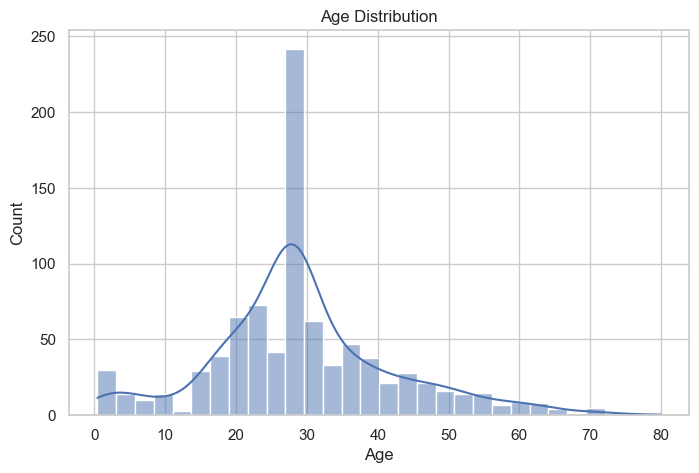

In [13]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

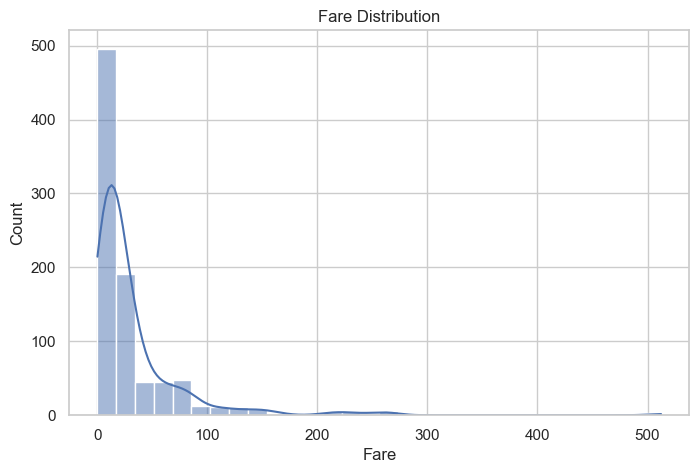

In [14]:
# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

In [15]:
## Step 6: Box Plots (Detecting Outliers)

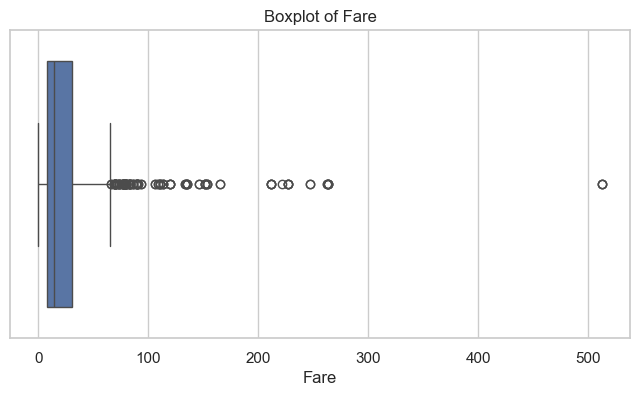

In [16]:
# Boxplot of Fare
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

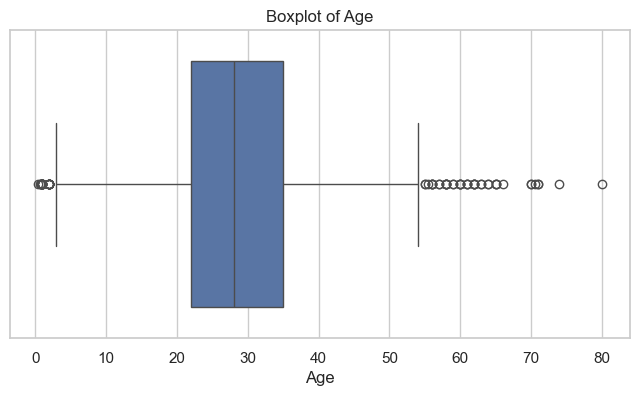

In [17]:
# Boxplot of Age
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

In [18]:
## Step 7: Relationship Analysis

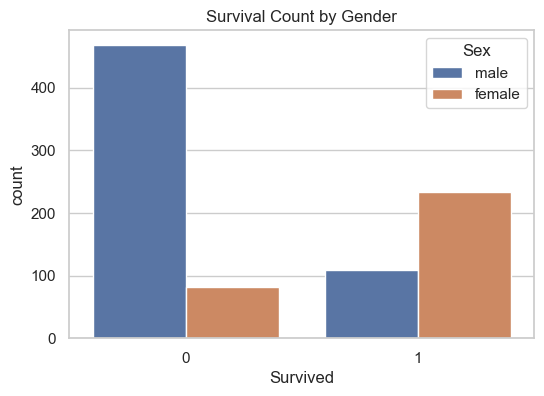

In [19]:
# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

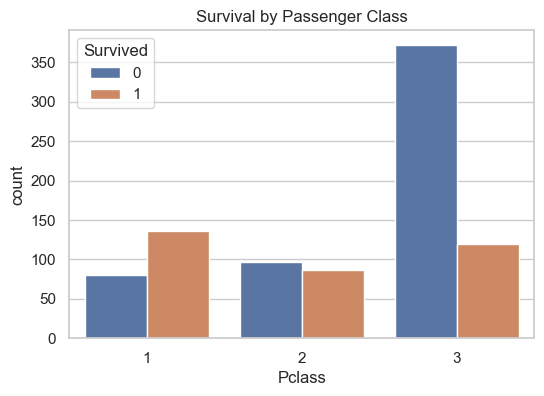

In [20]:
# Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

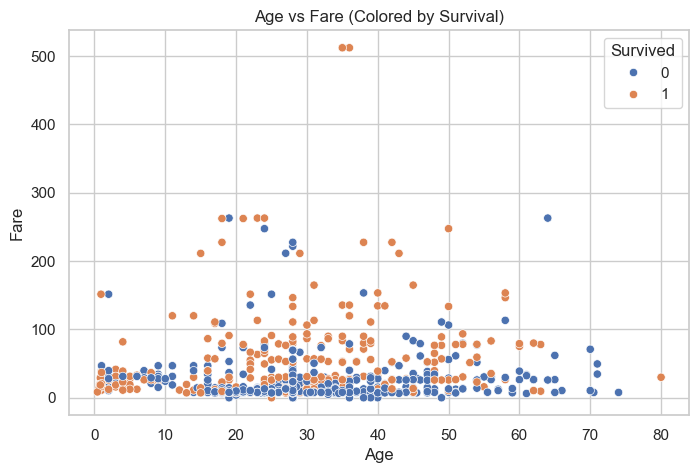

In [21]:
# Age vs Fare Scatter Plot colored by Survived
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare (Colored by Survival)')
plt.show()

In [22]:
## Step 8: Correlation Heatmap

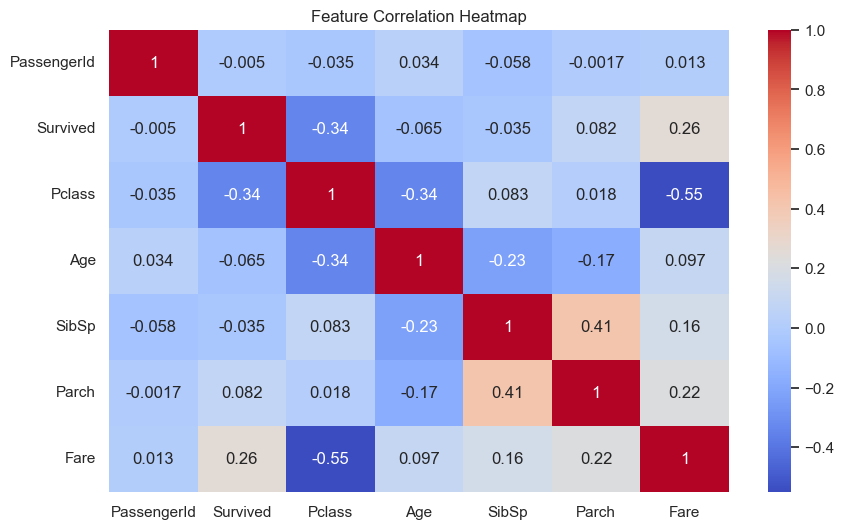

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [24]:
## Step 9: Additional Visualizations (Optional)

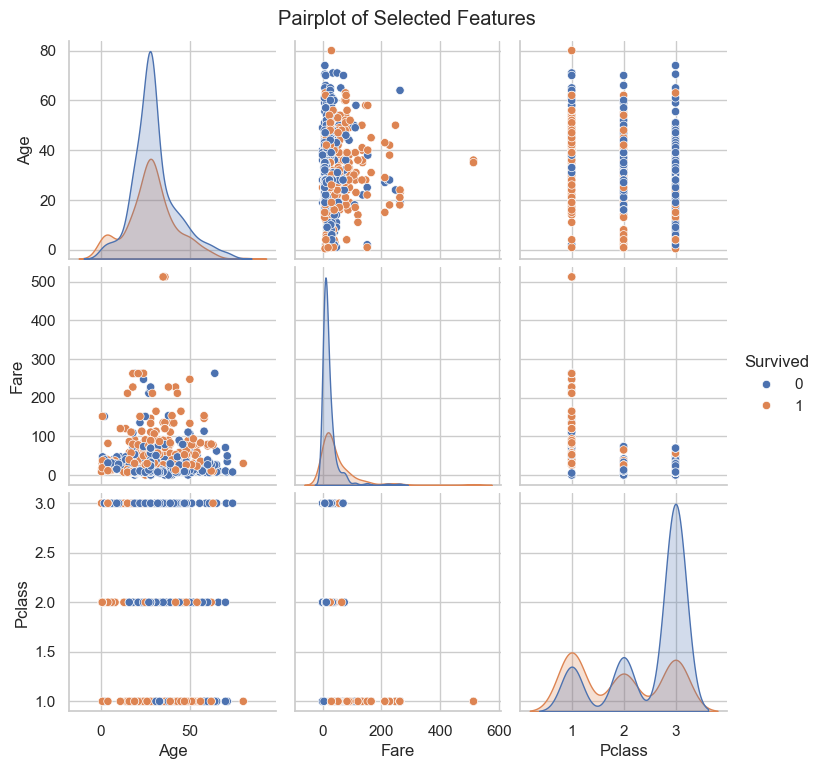

In [25]:
# Pairplot (limited features)
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [26]:
# End of notebook
print("\nIn-depth EDA completed successfully!")


In-depth EDA completed successfully!
